In [5]:
!pip install pandas matplotlib seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.16.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------- ------------------------- 2.9/8.1 MB 16.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 17.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 16.8 MB/s  0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl (8.7 MB)
Using cached cycler-0.12.1-py3-non

In [9]:
data = pd.read_csv('my_xxxx.csv')

In [10]:
data

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397
...,...,...,...,...,...
345,346,M,4,Software Engineer,107647
346,347,F,12,Web Developer,147836
347,348,F,19,DevOps Engineer,242819
348,349,M,9,Systems Administrator,115769


In [12]:
from sklearn.preprocessing import LabelEncoder

# Tạo bản sao để xử lý
data_processed = data.copy()

# Label Encoding cho cột Gender
le_gender = LabelEncoder()
data_processed['Gender'] = le_gender.fit_transform(data['Gender'])
print(f"✅ Gender encoding:")
for i, label in enumerate(le_gender.classes_):
    print(f"   {label} -> {i}")

# Label Encoding cho cột Position  
le_position = LabelEncoder()
data_processed['Position'] = le_position.fit_transform(data['Position'])
print(f"\n✅ Position encoding:")
for i, label in enumerate(le_position.classes_):
    print(f"   {label} -> {i}")

print(f"\n📋 Dữ liệu sau khi encoding:")
print(data_processed.head())

✅ Gender encoding:
   F -> 0
   M -> 1

✅ Position encoding:
   Cloud Solutions Architect -> 0
   Database Administrator (DBA) -> 1
   DevOps Engineer -> 2
   IT Manager -> 3
   IT Security Analyst -> 4
   IT Support Specialist -> 5
   Network Administrator -> 6
   Software Engineer -> 7
   Systems Administrator -> 8
   Systems Analyst -> 9
   Web Developer -> 10

📋 Dữ liệu sau khi encoding:
   ID  Gender  Experience (Years)  Position  Salary
0   1       0                   4         2  109976
1   2       1                   6         2  120088
2   3       1                  17        10  181301
3   4       1                   7         8   77530
4   5       0                  13         8  152397


 Label Encoding thực sự có thể tạo ra sự phân biệt không mong muốn.⚠️ Vấn đề với Label Encoding:
Gender: F→0, M→1

Model có thể hiểu M "lớn hơn" F (1 > 0)
Tạo ra quan hệ thứ tự không tồn tại



Position: Cloud Solutions Architect→0, Web Developer→10

Model có thể nghĩ Web Developer "quan trọng hơn" 10 lần so với Cloud Solutions Architect
Tạo ra bias không đúng

In [22]:
# -*- coding: utf-8 -*-
# Compute MSE & R^2 of RandomForestRegressor (n_estimators=50, random_state=42)
# on my_xxxx.csv. Uses LabelEncoder for categorical cols and drops ID.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1) Load data (đổi path nếu chạy ở nơi khác)
df = pd.read_csv("my_xxxx.csv")

# 2) Encode categorical features
df_enc = df.copy()
for col in ["Gender", "Position"]:
    enc = LabelEncoder()
    df_enc[col] = enc.fit_transform(df_enc[col].astype(str))

# 3) Features/target (drop ID vì chỉ là định danh)
X = df_enc.drop(columns=["Salary", "ID"])
y = df_enc["Salary"]

# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5) Train Random Forest
rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)

# 6) Predict & evaluate
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE (exact):", mse)
print("R^2  (exact):", r2)
print(f"MSE (rounded 4dp): {mse:.4f}")
print(f"R^2  (rounded 4dp): {r2:.4f}")


MSE (exact): 972381168.1177992
R^2  (exact): 0.3186548310513897
MSE (rounded 4dp): 972381168.1178
R^2  (rounded 4dp): 0.3187


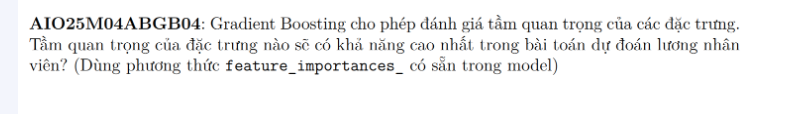

ValueError: input_features is not equal to feature_names_in_